In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [2]:
data = {
    'Weather': ['Sunny', 'Rainy', 'Overcast', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Rainy', 'Sunny', 'Rainy'],
    'TimeOfDay': ['Morning', 'Morning', 'Afternoon', 'Afternoon', 'Evening', 'Morning', 'Morning', 'Afternoon', 'Evening', 'Morning'],
    'SleepQuality': ['Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good', 'Good', 'Poor'],
    'Mood': ['Tired', 'Fresh', 'Tired', 'Energetic', 'Tired', 'Fresh', 'Tired', 'Tired', 'Energetic', 'Tired'],
    'BuyCoffee': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)


In [3]:
df_encoded = df.copy()
label_encoders = {}

for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [5]:
X = df_encoded.drop('BuyCoffee', axis=1)
y = df_encoded['BuyCoffee']

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

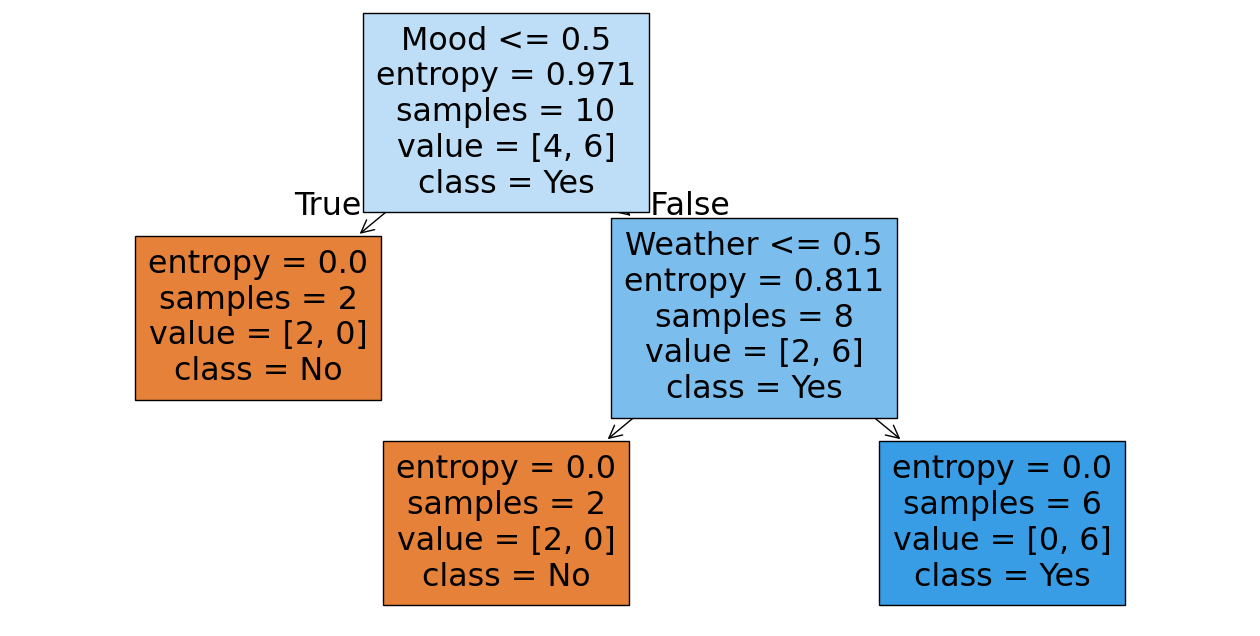

In [6]:
plt.figure(figsize=(16, 8))
plot_tree(model,
          feature_names=X.columns,
          class_names=label_encoders['BuyCoffee'].classes_,
          filled=True)
plt.show()


In [7]:
test_input = pd.DataFrame([{
    'Weather': label_encoders['Weather'].transform(['Rainy'])[0],
    'TimeOfDay': label_encoders['TimeOfDay'].transform(['Morning'])[0],
    'SleepQuality': label_encoders['SleepQuality'].transform(['Poor'])[0],
    'Mood': label_encoders['Mood'].transform(['Tired'])[0],
}])

prediction = model.predict(test_input)
predicted_label = label_encoders['BuyCoffee'].inverse_transform(prediction)[0]
print("Predicted Output:", predicted_label)


Predicted Output: Yes


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.tree import _tree

def print_decision_path(model, feature_names, sample):
    tree_ = model.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    node_indicator = model.decision_path(sample)
    leave_id = model.apply(sample)

    st.subheader("Decision Path:")
    for node_id in node_indicator.indices:
        if leave_id[0] == node_id:
            st.markdown(f"**➡️ Reached leaf node {node_id}**")
            break
        else:
            threshold = tree_.threshold[node_id]
            feature = feature_name[node_id]
            value = sample[0, tree_.feature[node_id]]
            if value <= threshold:
                st.markdown(f"`{feature} <= {threshold:.2f}`")
            else:
                st.markdown(f"`{feature} > {threshold:.2f}`")

# Example call (this goes inside st.button or st.form):
# print_decision_path(model, X.columns, test_input.values)


Decision path:

Mood > 0.50
Weather > 0.50
--> Reached leaf node 4


C:\Users\bkish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\bkish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
